# Data Cleaning 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import pearsonr, spearmanr, zscore
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

sns.set()

In [3]:
raw_sleep = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [4]:
raw_sleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
sleep = raw_sleep.copy()

In [6]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [7]:
# To Do (Column Names, Casing, Spelling, etc.)

# 1. Make columns lowercase
# 2. Make columns snake case

In [8]:
# To Do (Validate Data Types)

# 1. Change Person ID to string/object

In [9]:
sleep.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [10]:
# Columns With Missing Values

# 1. Sleep Disorder

<Axes: ylabel='Age'>

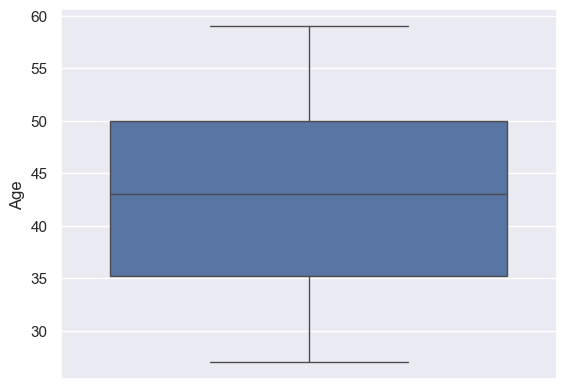

In [11]:
sns.boxplot(data = sleep['Age'])

In [12]:
sleep['Age'].describe()

count    374.000000
mean      42.184492
std        8.673133
min       27.000000
25%       35.250000
50%       43.000000
75%       50.000000
max       59.000000
Name: Age, dtype: float64

<Axes: ylabel='Sleep Duration'>

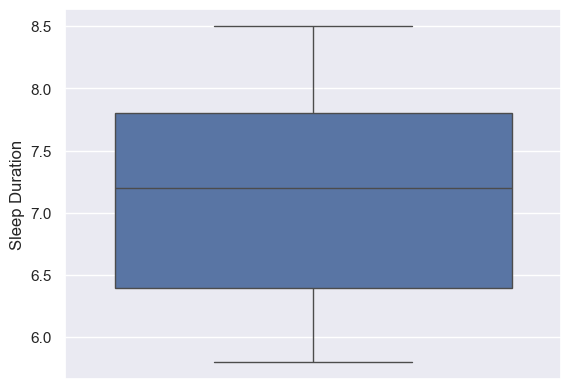

In [13]:
sns.boxplot(data = sleep['Sleep Duration'])

In [14]:
sleep['Sleep Duration'].describe()

count    374.000000
mean       7.132086
std        0.795657
min        5.800000
25%        6.400000
50%        7.200000
75%        7.800000
max        8.500000
Name: Sleep Duration, dtype: float64

<Axes: ylabel='Quality of Sleep'>

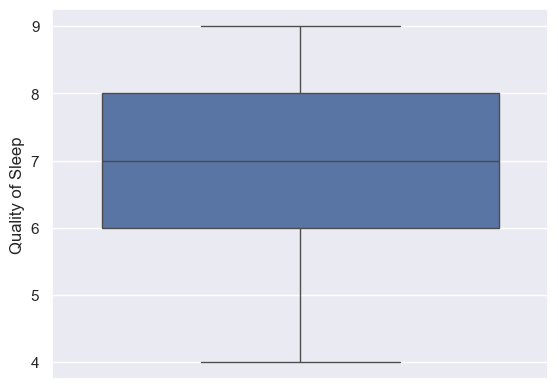

In [15]:
sns.boxplot(data = sleep['Quality of Sleep'])

In [16]:
sleep['Quality of Sleep'].describe()

count    374.000000
mean       7.312834
std        1.196956
min        4.000000
25%        6.000000
50%        7.000000
75%        8.000000
max        9.000000
Name: Quality of Sleep, dtype: float64

<Axes: ylabel='Physical Activity Level'>

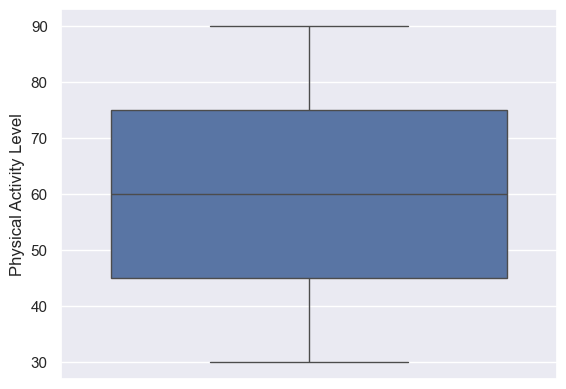

In [17]:
sns.boxplot(data = sleep['Physical Activity Level'])

In [18]:
sleep['Physical Activity Level'].describe()

count    374.000000
mean      59.171123
std       20.830804
min       30.000000
25%       45.000000
50%       60.000000
75%       75.000000
max       90.000000
Name: Physical Activity Level, dtype: float64

<Axes: ylabel='Stress Level'>

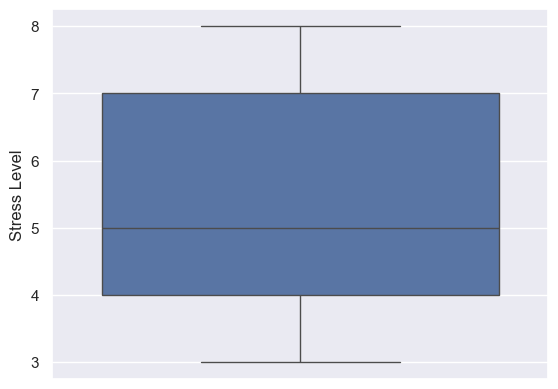

In [19]:
sns.boxplot(data = sleep['Stress Level'])

In [20]:
sleep['Stress Level'].describe()

count    374.000000
mean       5.385027
std        1.774526
min        3.000000
25%        4.000000
50%        5.000000
75%        7.000000
max        8.000000
Name: Stress Level, dtype: float64

<Axes: ylabel='Blood Pressure'>

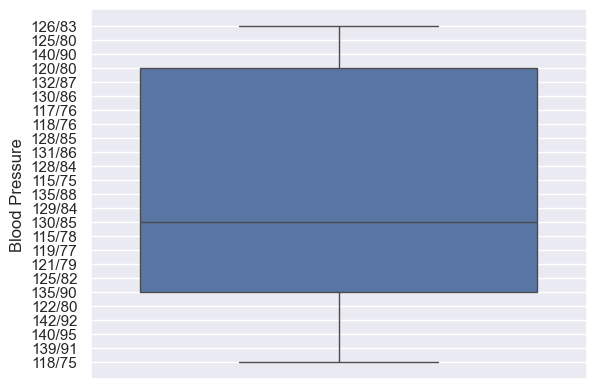

In [21]:
sns.boxplot(data = sleep['Blood Pressure'])

In [22]:
sleep['Blood Pressure'].describe()

count        374
unique        25
top       130/85
freq          99
Name: Blood Pressure, dtype: object

<Axes: ylabel='Heart Rate'>

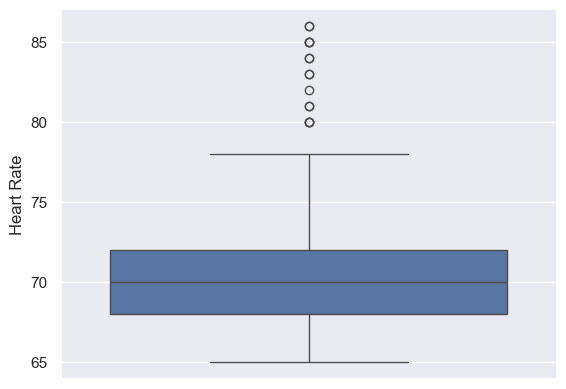

In [23]:
sns.boxplot(data = sleep['Heart Rate'])

In [24]:
sleep['Heart Rate'].describe()

count    374.000000
mean      70.165775
std        4.135676
min       65.000000
25%       68.000000
50%       70.000000
75%       72.000000
max       86.000000
Name: Heart Rate, dtype: float64

In [25]:
# For the Heart Rate variable, it looks like there are suspected outliers. I'll take a closer look at this later 
# using the zscore method. 

<Axes: ylabel='Daily Steps'>

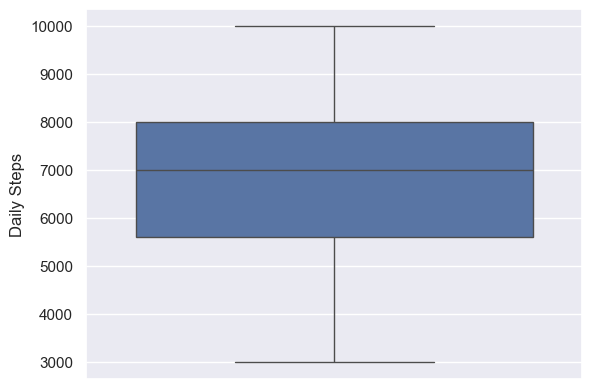

In [26]:
sns.boxplot(data = sleep['Daily Steps'])

In [27]:
sleep['Daily Steps'].describe()

count      374.000000
mean      6816.844920
std       1617.915679
min       3000.000000
25%       5600.000000
50%       7000.000000
75%       8000.000000
max      10000.000000
Name: Daily Steps, dtype: float64

In [28]:
# Columns with Outliers

# 1. Heart Rate

In [29]:
# Data Cleaning Plan

# Naming & Datatype Issues

# 1. Make columns lowercase
# 2. Make columns snake case
# 3. Change Person ID to string/object

# Missing Values

# 1. Sleep Disorder

# Outliers

# 1. Heart Rate

In [30]:
### DEFINE ###

# Make columns lowercase

### CLEAN ### 

sleep.columns = sleep.columns.str.lower()

### TEST ###

sleep.head()

,person id,gender,age,occupation,sleep duration,quality of sleep,physical activity level,stress level,bmi category,blood pressure,heart rate,daily steps,sleep disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [31]:
### DEFINE ###

# Make columns snake case

### CLEAN ### 

sleep.columns = sleep.columns.str.replace(' ', '_')

### TEST ###

sleep.head()

,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [32]:
### DEFINE ###

# The Person ID column is currently an integer data type. It needs to be changed to a string/object.

### CLEAN ### 

sleep.person_id = sleep.person_id.astype(str)

### TEST ###

print(sleep['person_id']) # successful output should show the id dtype as an object

0        1
1        2
2        3
3        4
4        5
      ... 
369    370
370    371
371    372
372    373
373    374
Name: person_id, Length: 374, dtype: object


In [33]:
### DEFINE ###

# There are 219 missing values in the sleep_disorder column.
# The missing values will be filled with the mode.

### CLEAN ### 

sleep_disorder_mode = sleep['sleep_disorder'].mode()

sleep['sleep_disorder'].fillna(value = sleep_disorder_mode[0], inplace = True)

### TEST ###

sleep.sleep_disorder.isna().sum()


0

In [34]:
sleep['heart_rate_zscore'] = zscore(sleep['heart_rate'])

In [35]:
sleep.query('heart_rate_zscore > 3 or heart_rate_zscore < -3')

,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder,heart_rate_zscore
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,3.591698
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,3.591698
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia,3.591698
93,94,Male,35,Lawyer,7.4,7,60,5,Obese,135/88,84,3300,Sleep Apnea,3.349575
145,146,Female,38,Lawyer,7.4,7,60,5,Obese,135/88,84,3300,Sleep Apnea,3.349575
264,265,Male,48,Doctor,7.3,7,65,5,Obese,142/92,83,3500,Insomnia,3.107453
266,267,Male,48,Doctor,7.3,7,65,5,Obese,142/92,83,3500,Insomnia,3.107453
276,277,Male,49,Doctor,8.1,9,85,3,Obese,139/91,86,3700,Sleep Apnea,3.833820
277,278,Male,49,Doctor,8.1,9,85,3,Obese,139/91,86,3700,Sleep Apnea,3.833820


In [36]:
# There are only 9 out 374 rows where heart_rate_zscore > 3 or < -3, so I am deciding to remove these outliers.
# There is enough data without them. 

In [37]:
### DEFINE ###

# remove rows where the heart_rate_zscore column is outside of the |3| threshold

### CODE ### 

sleep = sleep.query('heart_rate_zscore < 3 and heart_rate_zscore > -3').copy()

### TEST ###

sleep.query('heart_rate_zscore > 3 or heart_rate_zscore < -3') # successful output should not have any rows

,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder,heart_rate_zscore


# Feature Engineering

In [38]:
sleep = sleep.iloc[:, :13]

In [39]:
sleep_ohc = pd.get_dummies(sleep, columns = ["gender", "occupation", "sleep_disorder"], dtype = int)

In [40]:
sleep_ohc

,person_id,age,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,...,occupation_Engineer,occupation_Lawyer,occupation_Manager,occupation_Nurse,occupation_Salesperson,occupation_Scientist,occupation_Software Engineer,occupation_Teacher,sleep_disorder_Insomnia,sleep_disorder_Sleep Apnea
0,1,27,6.1,6,42,6,Overweight,126/83,77,4200,...,0,0,0,0,0,0,1,0,0,1
1,2,28,6.2,6,60,8,Normal,125/80,75,10000,...,0,0,0,0,0,0,0,0,0,1
2,3,28,6.2,6,60,8,Normal,125/80,75,10000,...,0,0,0,0,0,0,0,0,0,1
6,7,29,6.3,6,40,7,Obese,140/90,82,3500,...,0,0,0,0,0,0,0,1,1,0
7,8,29,7.8,7,75,6,Normal,120/80,70,8000,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,59,8.1,9,75,3,Overweight,140/95,68,7000,...,0,0,0,1,0,0,0,0,0,1
370,371,59,8.0,9,75,3,Overweight,140/95,68,7000,...,0,0,0,1,0,0,0,0,0,1
371,372,59,8.1,9,75,3,Overweight,140/95,68,7000,...,0,0,0,1,0,0,0,0,0,1
372,373,59,8.1,9,75,3,Overweight,140/95,68,7000,...,0,0,0,1,0,0,0,0,0,1


In [41]:
sleep

,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Sleep Apnea
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Sleep Apnea
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Sleep Apnea
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


# Exploratory Data Analysis

In [ ]:
# Goal of exploratory analysis is to determine if a correlation exists between the two
# variables, stress_level and quality_of_sleep, and the two variables, stress_level 
# and sleep_duration.

In [42]:
sleep_subset_1 = sleep.loc[:, ['age', 'sleep_duration', 'quality_of_sleep', 'physical_activity_level', 'stress_level', 'blood_pressure', 'heart_rate', 'daily_steps']]

In [43]:
sleep_subset_1

,age,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,blood_pressure,heart_rate,daily_steps
0,27,6.1,6,42,6,126/83,77,4200
1,28,6.2,6,60,8,125/80,75,10000
2,28,6.2,6,60,8,125/80,75,10000
6,29,6.3,6,40,7,140/90,82,3500
7,29,7.8,7,75,6,120/80,70,8000
...,...,...,...,...,...,...,...,...
369,59,8.1,9,75,3,140/95,68,7000
370,59,8.0,9,75,3,140/95,68,7000
371,59,8.1,9,75,3,140/95,68,7000
372,59,8.1,9,75,3,140/95,68,7000


In [44]:
sleep_subset_2 = sleep.loc[:, ['quality_of_sleep','sleep_duration', 'stress_level']]

In [45]:
sleep_subset_2

,quality_of_sleep,sleep_duration,stress_level
0,6,6.1,6
1,6,6.2,8
2,6,6.2,8
6,6,6.3,7
7,7,7.8,6
...,...,...,...
369,9,8.1,3
370,9,8.0,3
371,9,8.1,3
372,9,8.1,3


In [46]:
# Null Hypothesis: No correlation exists between stress levels and sleep quality/duration.
# Alternative Hypothesis: A correlation exists between stress levels and sleep quality/duration.

In [47]:
pearsonr(sleep_subset_2['stress_level'], sleep_subset_2['quality_of_sleep'])

PearsonRResult(statistic=-0.9021503878866797, pvalue=1.3663296900971123e-134)

In [48]:
# Results for Pearsonr method indicate a very strong negative correlation between 
# stress_level and quality_of_sleep that is statistically significant. 

In [49]:
spearmanr(sleep_subset_2['stress_level'], sleep_subset_2['quality_of_sleep'])

SignificanceResult(statistic=-0.9070997562435439, pvalue=1.764451486665169e-138)

In [50]:
# Results for Spearmanr method indicate a very strong negative correlation between 
# stress_level and quality_of_sleep that is statistically significant. 

In [51]:
pearsonr(sleep_subset_2['stress_level'], sleep_subset_2['sleep_duration'])

PearsonRResult(statistic=-0.805713338076129, pvalue=1.409375747403549e-84)

In [52]:
# Results for Pearsonr method indicate a very strong negative correlation between 
# stress_level and sleep_duration that is statistically significant. 

In [53]:
spearmanr(sleep_subset_2['stress_level'], sleep_subset_2['sleep_duration'])

SignificanceResult(statistic=-0.8091438144741749, pvalue=7.808818013928244e-86)

In [54]:
# Results for Spearmanr method indicate a very strong negative correlation between 
# stress_level and sleep_duration that is statistically significant. 

In [55]:
sleep_subset_2.corr()

,quality_of_sleep,sleep_duration,stress_level
quality_of_sleep,1.000000,0.885384,-0.902150
sleep_duration,0.885384,1.000000,-0.805713
stress_level,-0.902150,-0.805713,1.000000


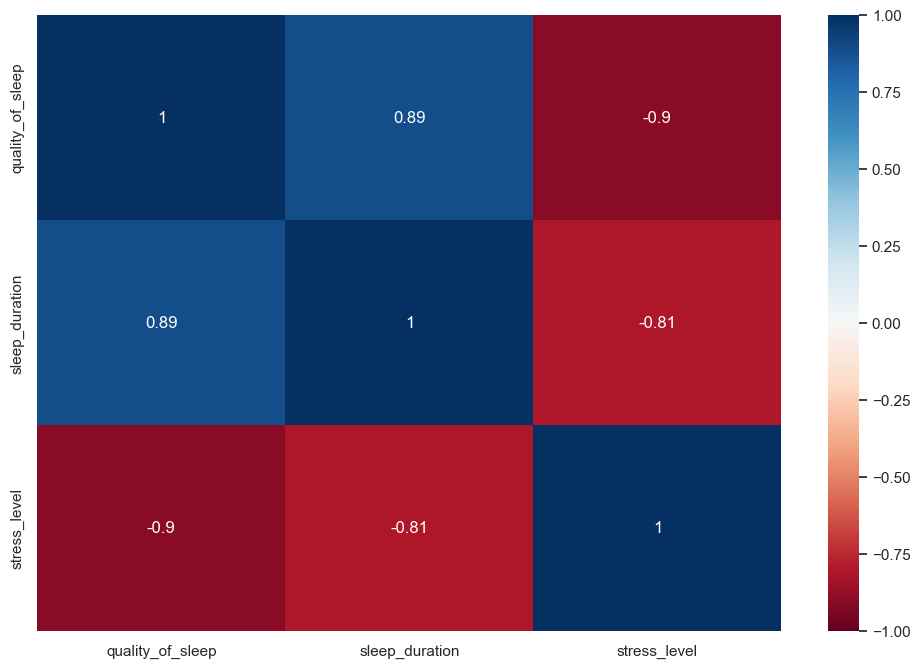

In [56]:
plt.figure(figsize=(12,8))

ax = sns.heatmap(sleep_subset_2.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)

In [57]:
# Hence, we reject the null hypothesis.

# Descriptive Statistics

In [58]:
sleep.describe()

,age,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,heart_rate,daily_steps
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,42.263014,7.134521,7.334247,59.232877,5.380822,69.810959,6902.739726
std,8.647993,0.794046,1.166405,20.827339,1.771311,3.500375,1540.494837
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3500.000000
25%,36.000000,6.400000,6.000000,45.000000,4.000000,68.000000,6000.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,82.000000,10000.000000


In [59]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   person_id                365 non-null    object 
 1   gender                   365 non-null    object 
 2   age                      365 non-null    int64  
 3   occupation               365 non-null    object 
 4   sleep_duration           365 non-null    float64
 5   quality_of_sleep         365 non-null    int64  
 6   physical_activity_level  365 non-null    int64  
 7   stress_level             365 non-null    int64  
 8   bmi_category             365 non-null    object 
 9   blood_pressure           365 non-null    object 
 10  heart_rate               365 non-null    int64  
 11  daily_steps              365 non-null    int64  
 12  sleep_disorder           365 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 39.9+ KB


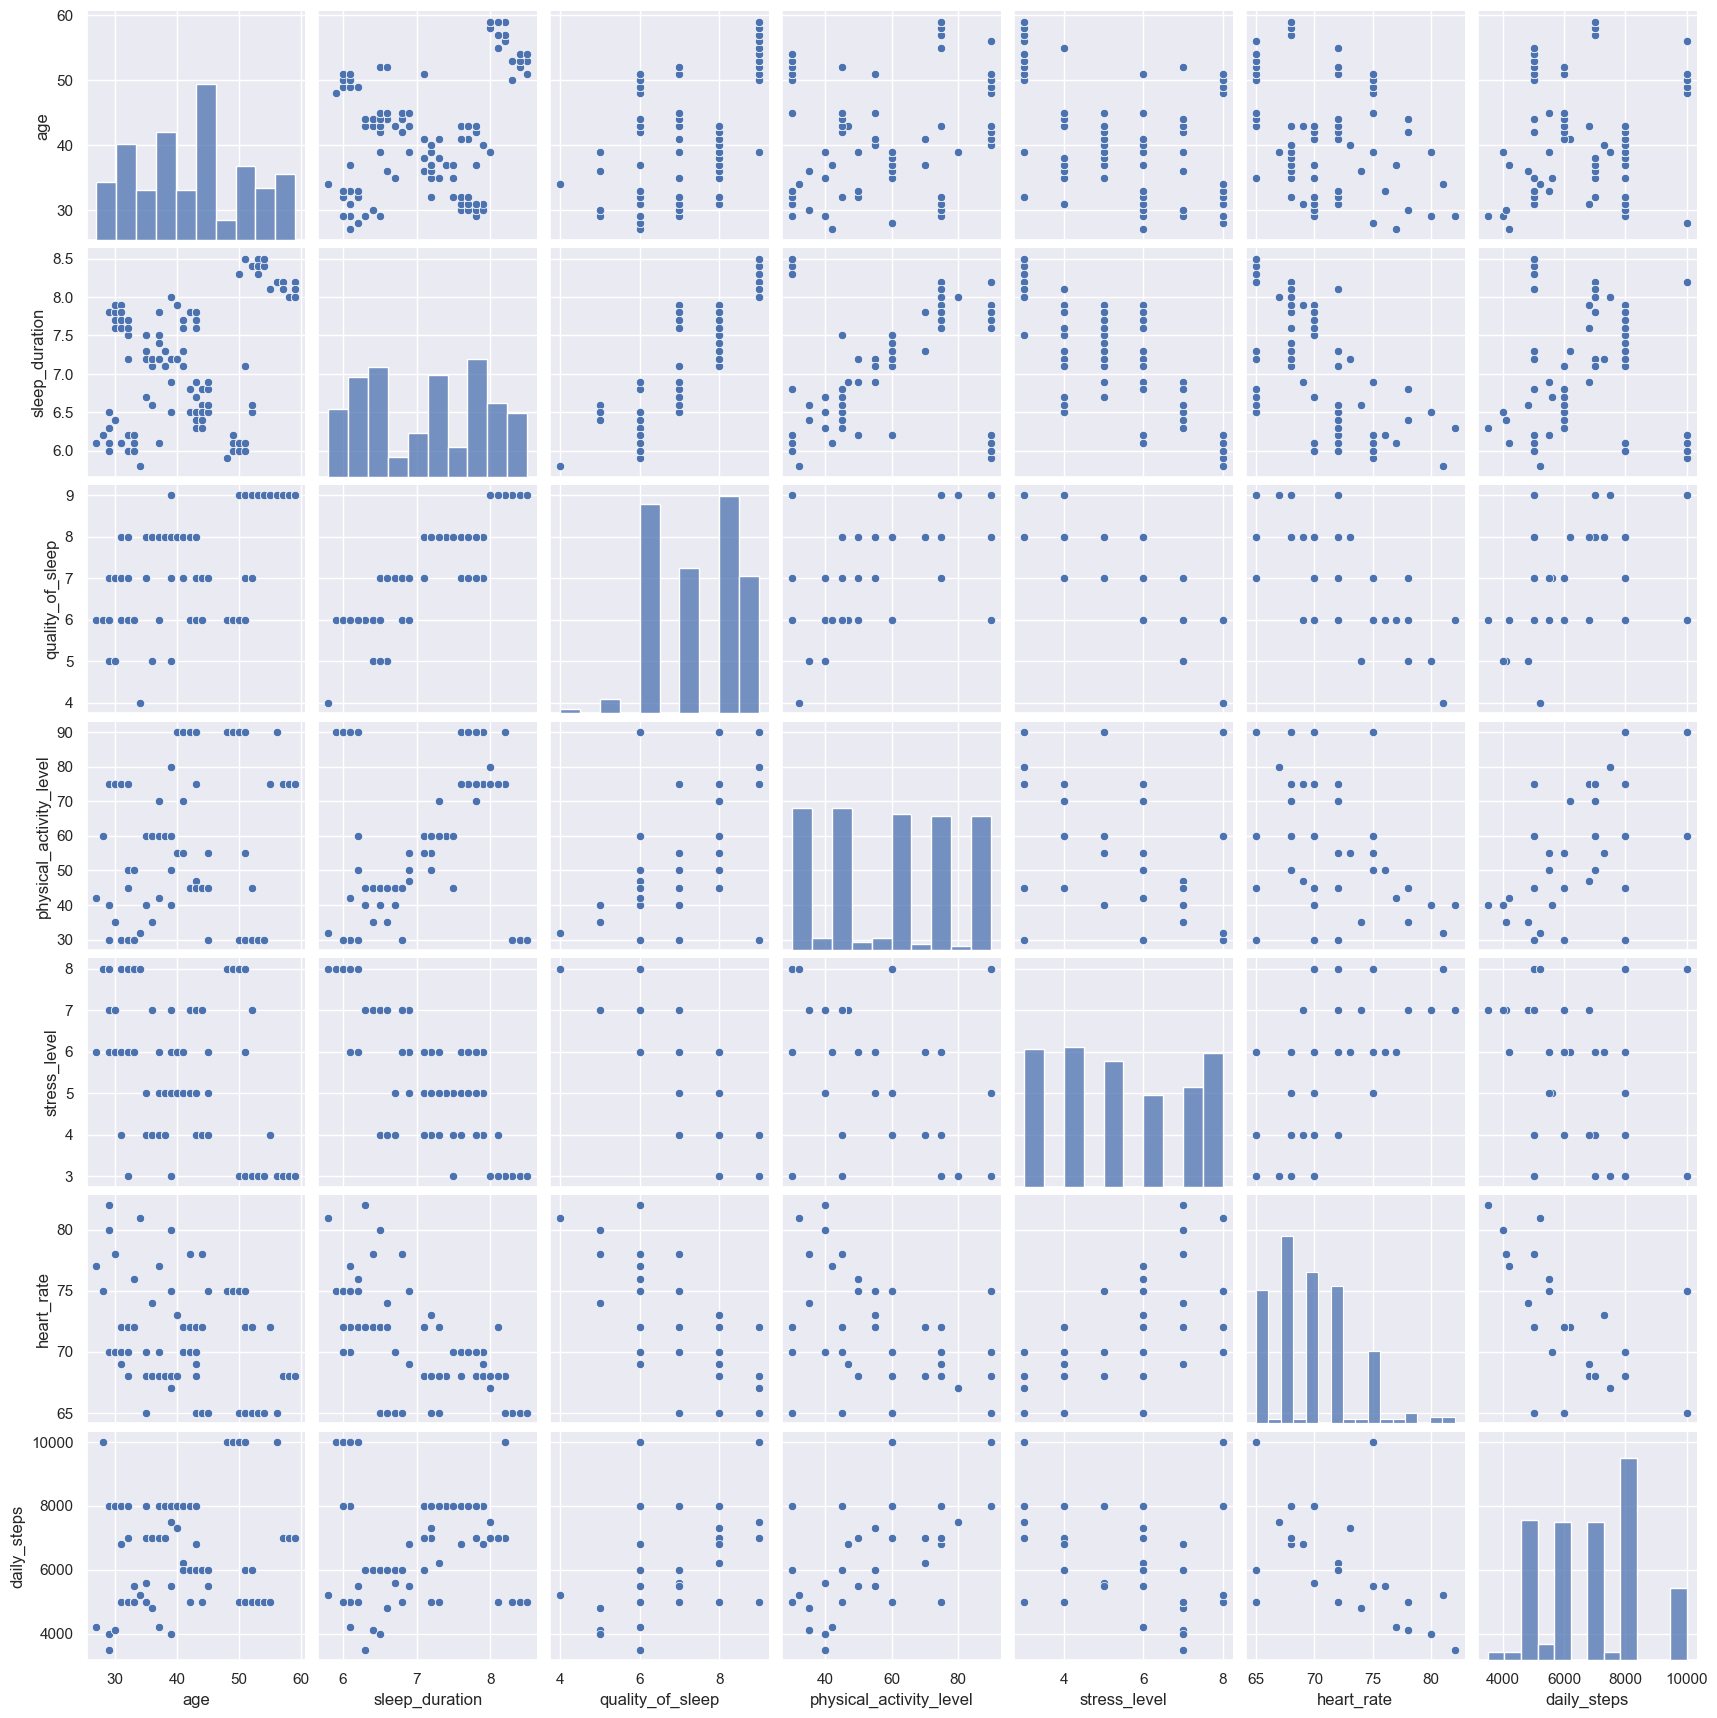

In [60]:
sns.pairplot(data = sleep)

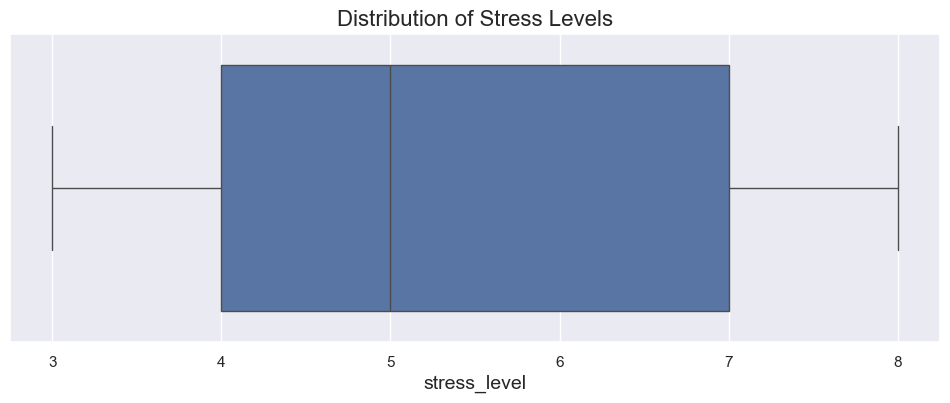

In [61]:
sleep['stress_level'].describe()

plt.figure(figsize=(12,4))

plt.title("Distribution of Stress Levels", fontsize=16)

sns.boxplot(x=sleep['stress_level'])

plt.xlabel("stress_level", fontsize=14);

In [62]:
sleep['stress_level'].mean()

5.380821917808219

In [63]:
sleep['stress_level'].std()

1.7713111749885064

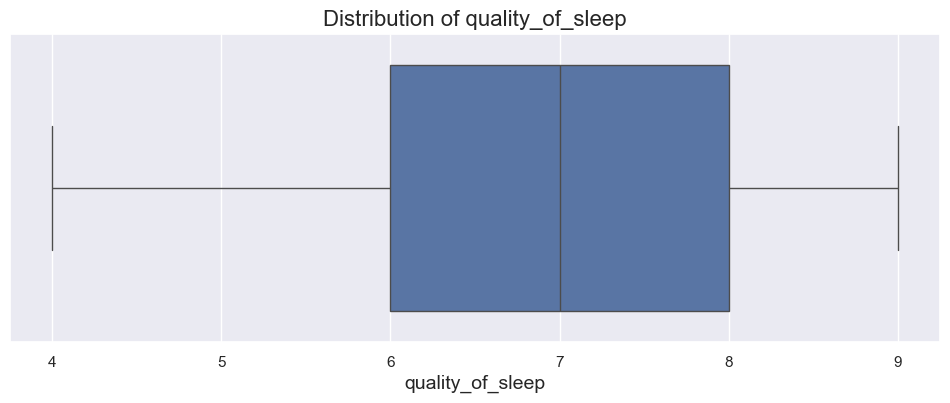

In [64]:
sleep['quality_of_sleep'].describe()

plt.figure(figsize=(12,4))

plt.title("Distribution of quality_of_sleep", fontsize=16)

sns.boxplot(x=sleep['quality_of_sleep'])

plt.xlabel("quality_of_sleep", fontsize=14);

In [65]:
sleep['quality_of_sleep'].std()

1.1664046357068372

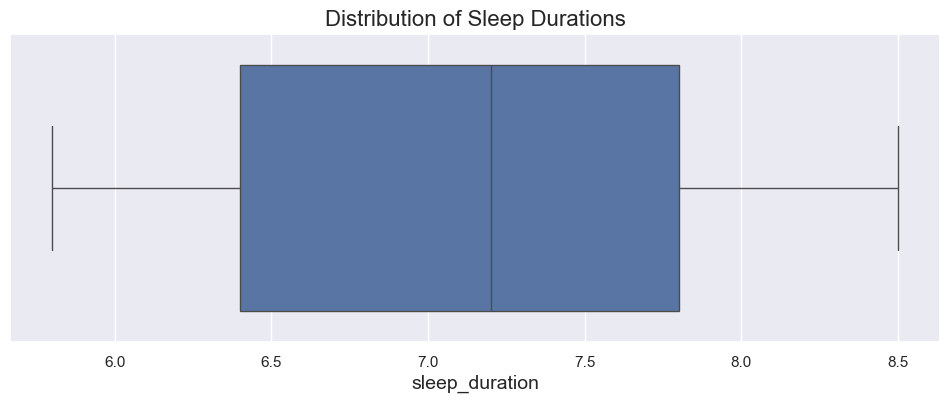

In [66]:
sleep['sleep_duration'].describe()

plt.figure(figsize=(12,4))

plt.title("Distribution of Sleep Durations", fontsize=16)

sns.boxplot(x=sleep['sleep_duration'])

plt.xlabel("sleep_duration", fontsize=14);

In [67]:
sleep['sleep_duration'].std()

0.7940455620800602

# Check For Missing Values

In [68]:
sleep.isna().sum()

person_id                  0
gender                     0
age                        0
occupation                 0
sleep_duration             0
quality_of_sleep           0
physical_activity_level    0
stress_level               0
bmi_category               0
blood_pressure             0
heart_rate                 0
daily_steps                0
sleep_disorder             0
dtype: int64

# Distributions of Numeric Variables

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sleep_duration'}>,
        <Axes: title={'center': 'quality_of_sleep'}>],
       [<Axes: title={'center': 'physical_activity_level'}>,
        <Axes: title={'center': 'stress_level'}>,
        <Axes: title={'center': 'heart_rate'}>],
       [<Axes: title={'center': 'daily_steps'}>, <Axes: >, <Axes: >]],
      dtype=object)

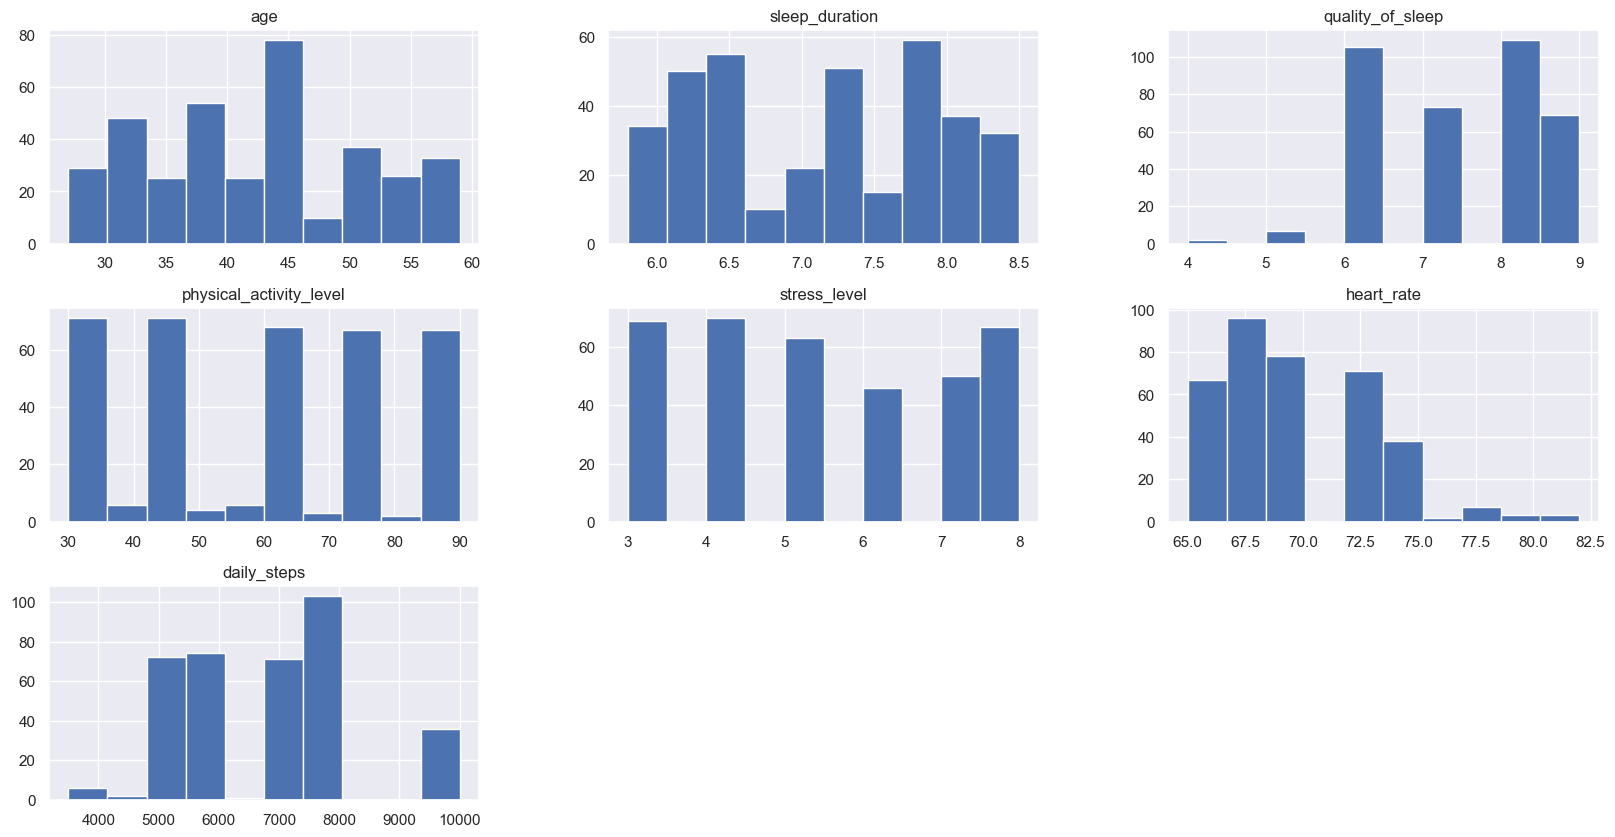

In [69]:
sleep_subset_1.hist(bins=10, figsize=(20,10))

# Visualizations of Major Variables

array([[<Axes: title={'center': 'quality_of_sleep'}>,
        <Axes: title={'center': 'sleep_duration'}>],
       [<Axes: title={'center': 'stress_level'}>, <Axes: >]], dtype=object)

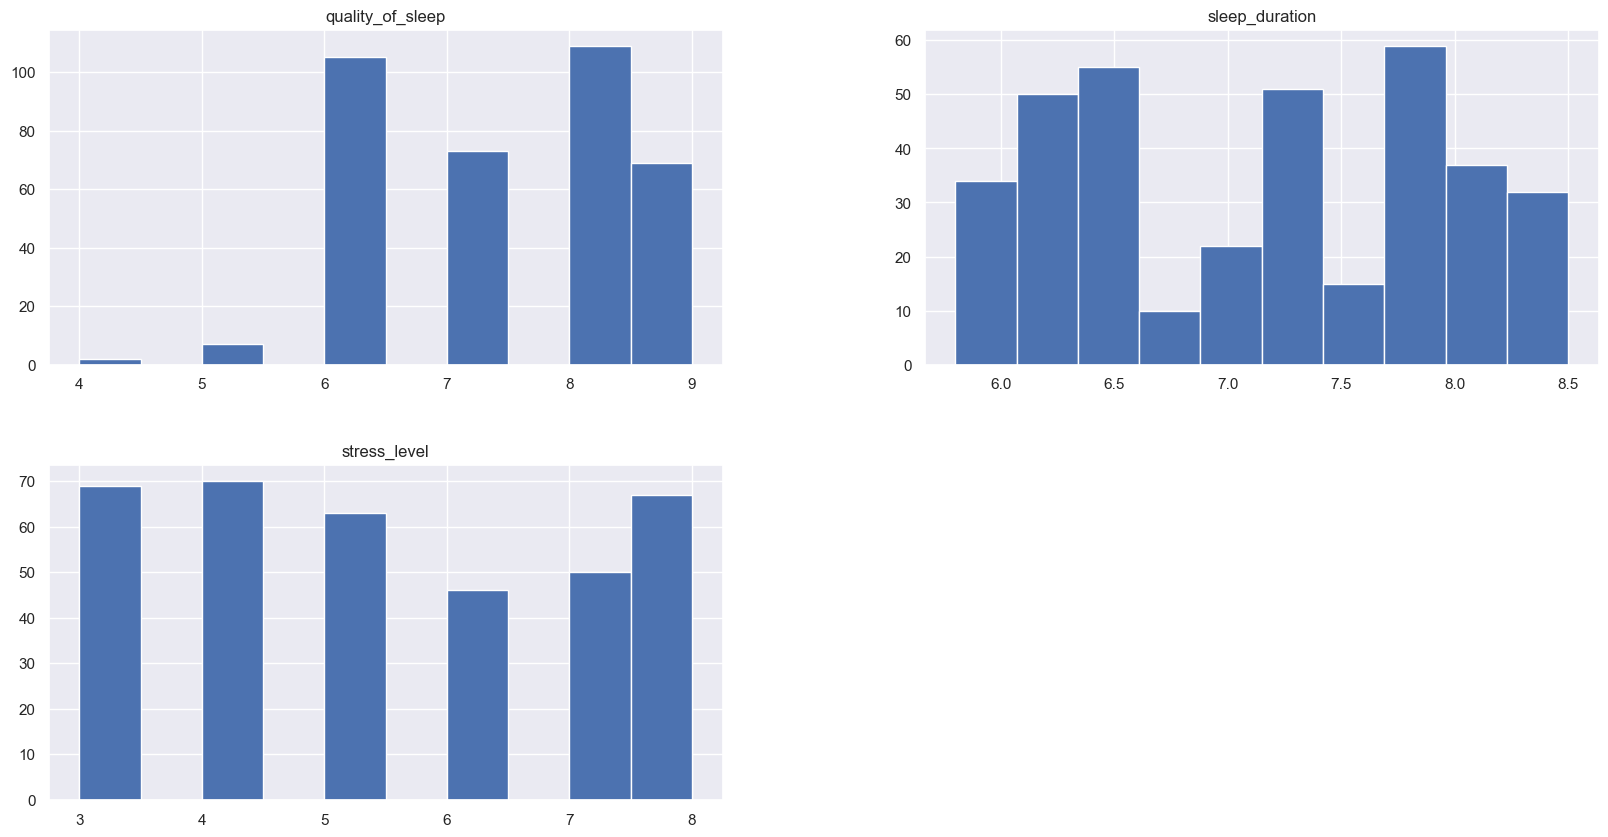

In [70]:
sleep_subset_2.hist(bins=10, figsize=(20,10))

<Axes: xlabel='stress_level', ylabel='quality_of_sleep'>

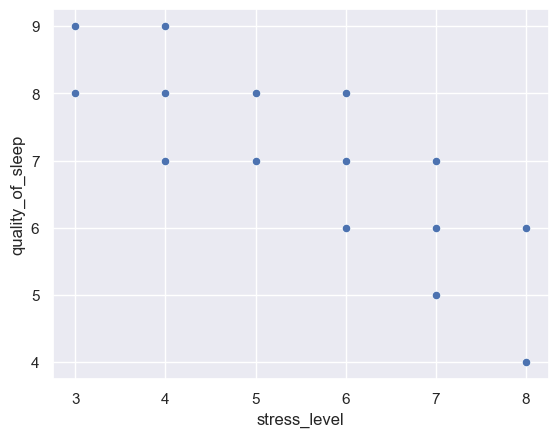

In [71]:
sns.scatterplot(x = 'stress_level', y = "quality_of_sleep", data = sleep_subset_2)

In [72]:
# quality_of_sleep tends to decrease as stress_level increases.

<Axes: xlabel='stress_level', ylabel='sleep_duration'>

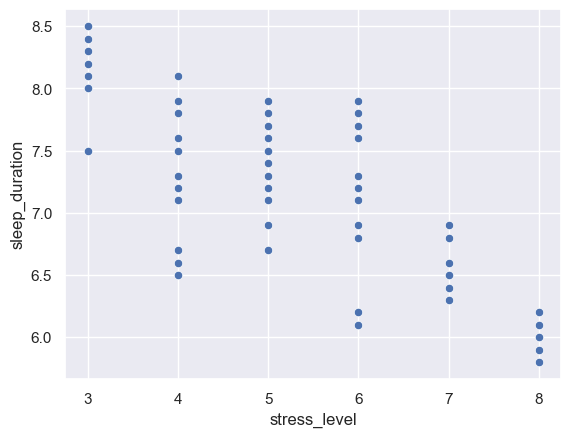

In [73]:
sns.scatterplot(x = 'stress_level', y = "sleep_duration", data = sleep_subset_2)

In [74]:
# sleep_duration tends to decrease as stress_level increases.

<Axes: xlabel='stress_level', ylabel='sleep_duration'>

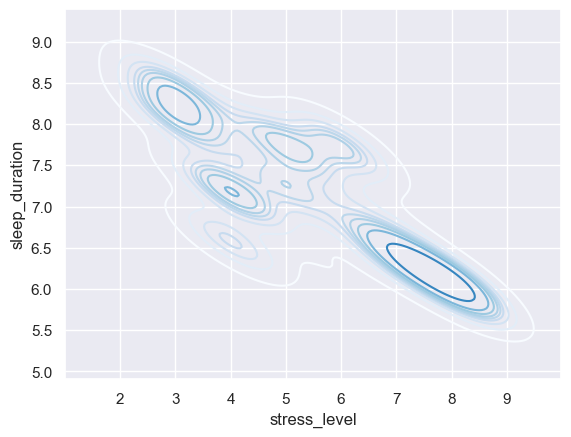

In [75]:
sns.kdeplot(x = 'stress_level', y = "sleep_duration", cmap="Blues", data = sleep_subset_2)

<Axes: xlabel='stress_level', ylabel='quality_of_sleep'>

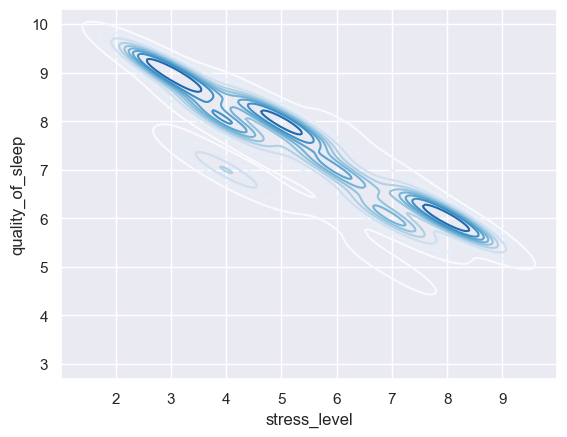

In [76]:
sns.kdeplot(x = 'stress_level', y = "quality_of_sleep", cmap="Blues", data = sleep_subset_2)

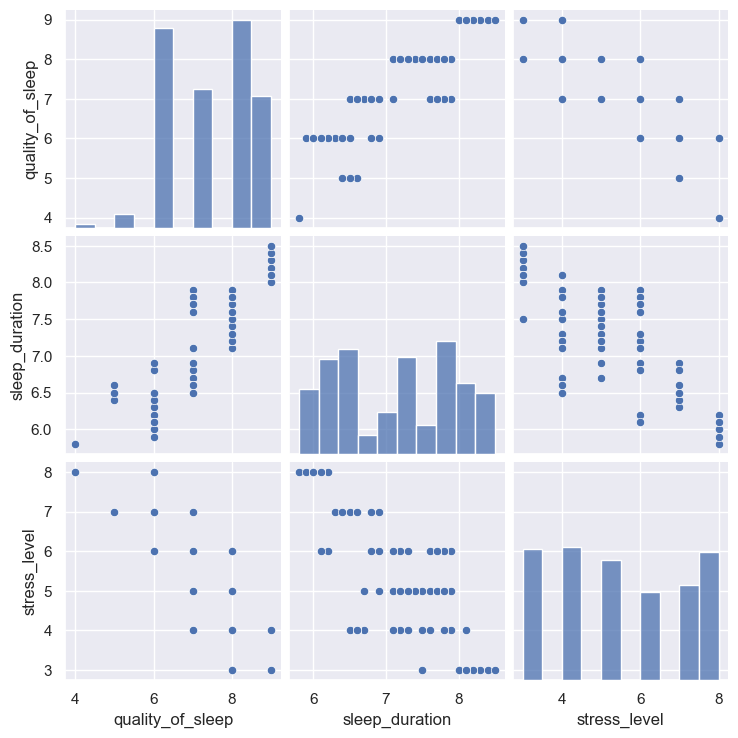

In [77]:
sns.pairplot(data = sleep_subset_2)

# Statistical Analysis

In [ ]:
# Goal of analysis is to see if a cause-and-effect relationship exists between
# the two variables, stress_level and sleep_duration, and the two variables, stress_level
# and quality_of_sleep.

In [78]:
sleep_subset_2

,quality_of_sleep,sleep_duration,stress_level
0,6,6.1,6
1,6,6.2,8
2,6,6.2,8
6,6,6.3,7
7,7,7.8,6
...,...,...,...
369,9,8.1,3
370,9,8.0,3
371,9,8.1,3
372,9,8.1,3


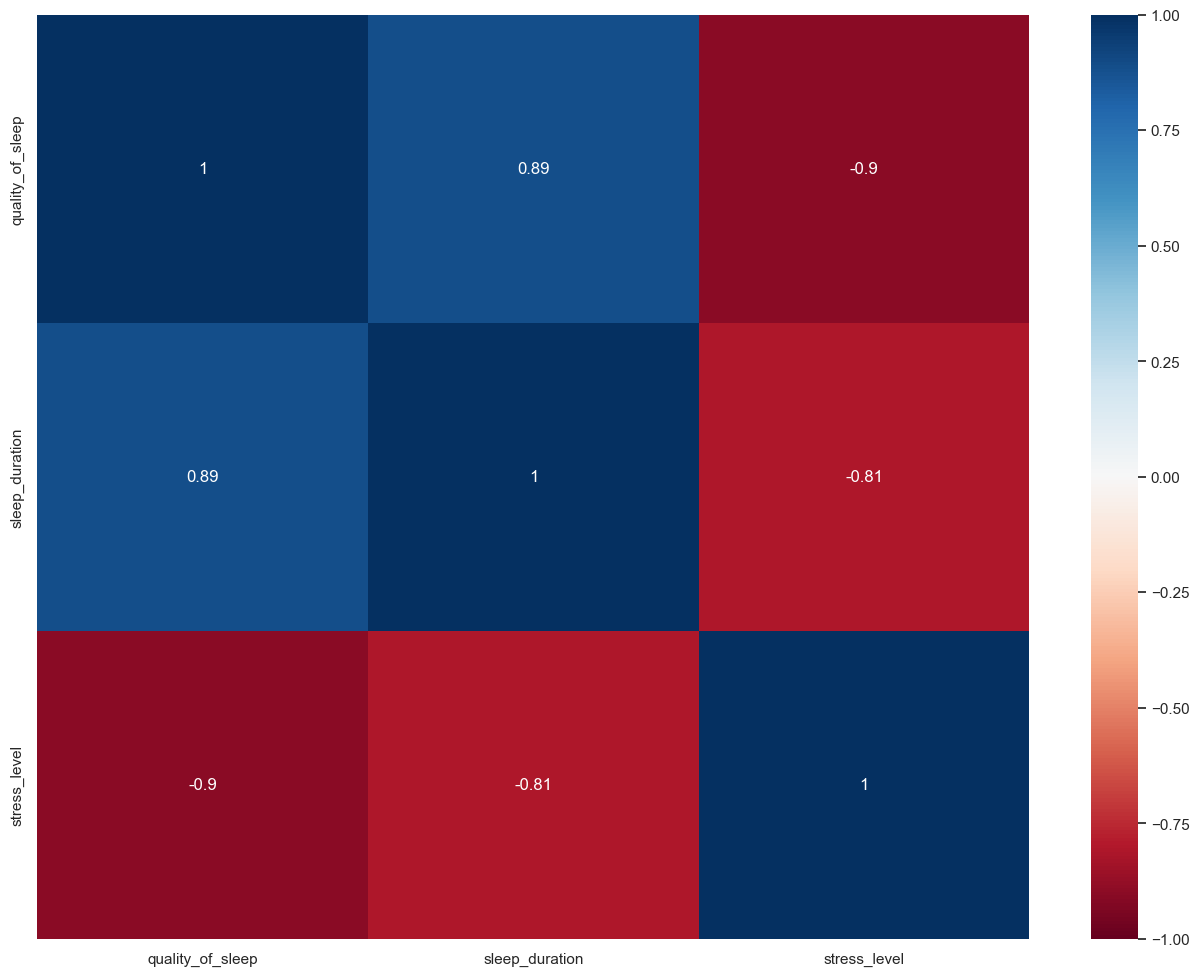

In [79]:
plt.figure(figsize=(16,12))

ax = sns.heatmap(sleep_subset_2.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)

In [ ]:
# Based on the heatmap, we can see that a very strong negative linear relationship exists between stress_level
# and quality_of_sleep, denoted by the correlation coefficient of -0.9. I will use this linear relationship
# for my linear regression model, with the independent variable being stress_level. 

In [ ]:
# Null Hypothesis: Stress levels do not affect one's sleep quality.
# Alternative Hypothesis: Stress levels affect one's sleep quality. 

In [80]:
# set X 

x1 = sleep_subset_2['stress_level']

# set Y 

y = sleep_subset_2['quality_of_sleep']


In [ ]:
# Visualize relationship between X and Y

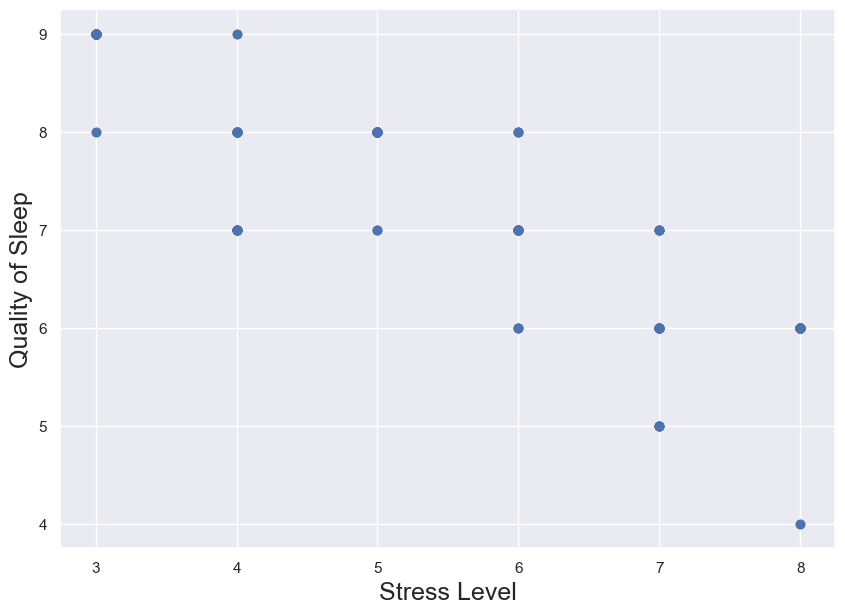

In [99]:
plt.figure(figsize = (10, 7))
plt.scatter(x1,y)
plt.xlabel('Stress Level', fontsize = 18)
plt.ylabel('Quality of Sleep', fontsize = 18);

<Axes: xlabel='stress_level', ylabel='quality_of_sleep'>

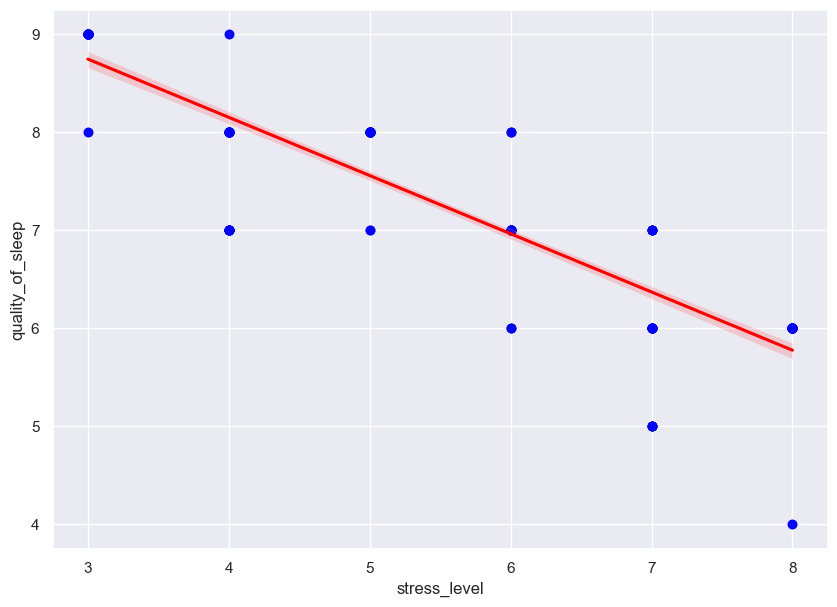

In [98]:
plt.figure(figsize=(10, 7))
sns.regplot(x = 'stress_level', y = 'quality_of_sleep', data = sleep_subset_2, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

In [86]:
x = sm.add_constant(x1)

In [87]:
results = sm.OLS(y,x).fit()

In [88]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       quality_of_sleep   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1587.
Date:                Wed, 27 Dec 2023   Prob (F-statistic):          1.37e-134
Time:                        13:25:45   Log-Likelihood:                -266.75
No. Observations:                 365   AIC:                             537.5
Df Residuals:                     363   BIC:                             545.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.5308      0.084    124.688      0.000      10.365      10.697
stress_level    -0.5941      0.015    -39.841      0.000      -0.623      -0.565
==============================================================================
Omnibus:                       81.267   Durbin-Watson:                   0.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.307
Skew:                          -1.308   Prob(JB):                     2.52e-30
Kurtosis:                       4.456   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# R-squared

# The model's r-squared measures the variability of the model's data. Because 
# 0.814 is a higher variability, this indicates that the chosen model is a good fit
# for the data.

In [ ]:
# Coefficient of Independent Variable

# The model's coefficient of the independent variable (b1) quantified the effect the 
# stress_level variable had on the quality_of_sleep variable. It looks like the effect
# was quantified by -0.5941.

In [ ]:
# P-value of T-statistic

# The model's p-value of the t-statistic shows if the input variable is 
# significant or not in relation to the Y variable. The p-value is 0.000, 
# so in this case, we reject the null hypothesis since b1 is significant.

In [ ]:
# P-value of F-statistic

# The f-statistic tests the overall significance of the model. Thus, if 
# its p-value is less than 0.05, the overall model is significant. The 
# p-value of the model's f-statistic is 1.37e-134, so the overall model is significant.

In [ ]:
# Based on the heatmap above, we can also see that a very strong negative linear relationship exists between stress_level
# and sleep_duration, denoted by the correlation coefficient of -0.81. I will use this linear relationship
# for another linear regression model, with the independent variable still being stress_level. 

In [ ]:
# Null Hypothesis: Stress levels do not affect one's sleep duration.
# Alternate Hypothesis: Stress levels affect one's sleep duration. 

In [100]:
# set X 

x1 = sleep_subset_2['stress_level']

# set Y 

y = sleep_subset_2['sleep_duration']

In [ ]:
# Visualize relationship between X and Y

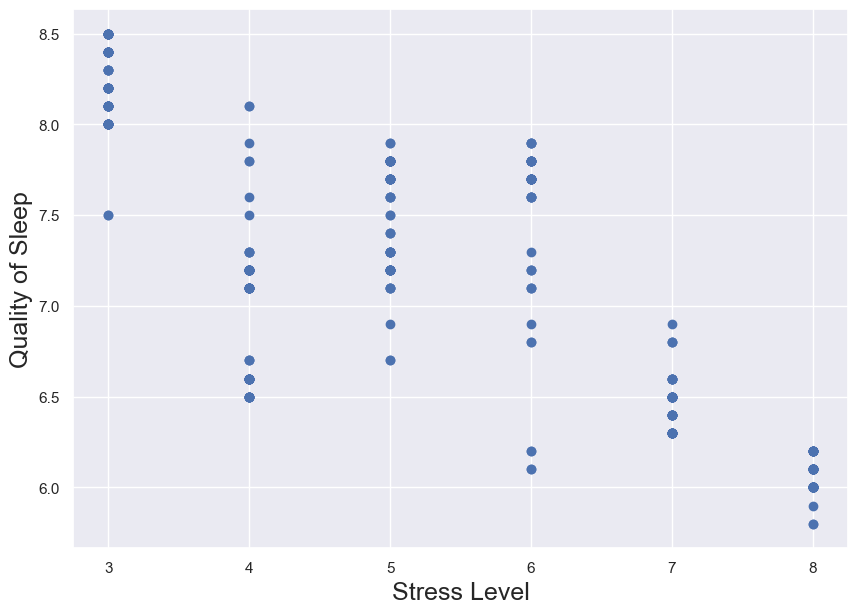

In [101]:
plt.figure(figsize = (10, 7))
plt.scatter(x1,y)
plt.xlabel('Stress Level', fontsize = 18)
plt.ylabel('Quality of Sleep', fontsize = 18);

<Axes: xlabel='stress_level', ylabel='sleep_duration'>

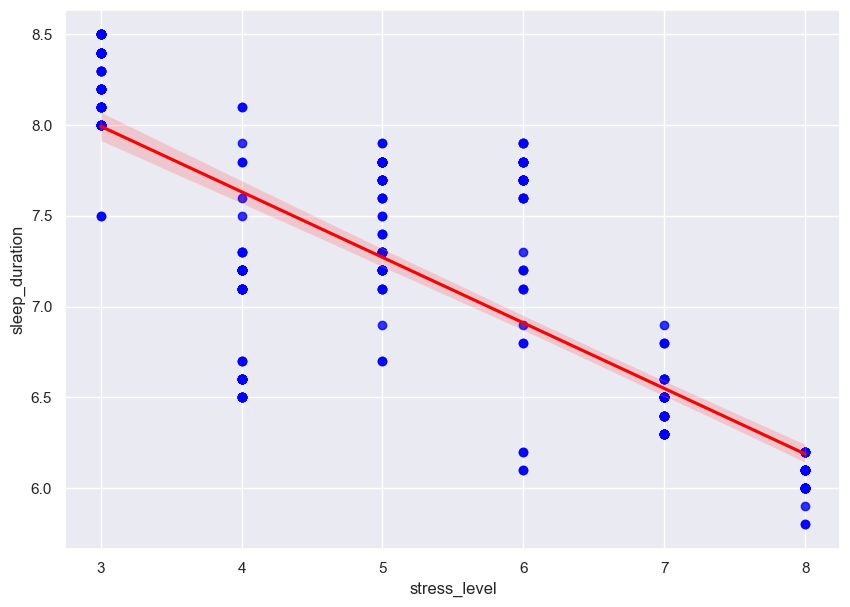

In [102]:
plt.figure(figsize=(10, 7))
sns.regplot(x = 'stress_level', y = 'sleep_duration', data = sleep_subset_2, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

In [103]:
x = sm.add_constant(x1)

In [104]:
results = sm.OLS(y,x).fit()

In [105]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         sleep_duration   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     671.7
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           1.41e-84
Time:                        14:33:03   Log-Likelihood:                -242.08
No. Observations:                 365   AIC:                             488.2
Df Residuals:                     363   BIC:                             496.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            9.0780      0.079    115.005      0.000       8.923       9.233
stress_level    -0.3612      0.014    -25.917      0.000      -0.389      -0.334
==============================================================================
Omnibus:                        4.810   Durbin-Watson:                   0.662
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                4.650
Skew:                          -0.274   Prob(JB):                       0.0978
Kurtosis:                       3.074   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# R-squared

# The model's r-squared measures the variability of the model's data. Because 
# 0.649 is a relatively high variability, this indicates that the chosen model is a good fit
# for the data.

In [ ]:
# Coefficient of independent variable

# The model's coefficient of the independent variable (b1) quantifies the effect the 
# stress_level variable has on the sleep_duration variable. It appears that the effect
# was quantified by -0.3612.

In [ ]:
# P-value of T-statistic

# The model's p-value of the t-statistic shows if the input variable is 
# significant or not in relation to the Y variable. The p-value is 0.000, 
# so in this case, we reject the null hypothesis since b1 is significant.

In [ ]:
# P-value of F-statistic

# The f-statistic tests the overall significance of the model. Thus, if 
# its p-value is less than 0.05, the overall model is significant. The 
# p-value of the model's f-statistic is 1.41e-84, so the overall model is significant.

In [ ]:
# Based on the analysis, it appears that not only do the quality_of_sleep and
# sleep_duration variables share a correlation with stress level, but also a 
# cause-and-effect relationship. Hence, an increase in stress levels tends to cause
# one's sleep quality and duration to decrease. 